# Analyze Categorical Data

## EDA(exploratory data analysis)

-> doing before analysis

### purpose

- understand key factor of data
- search pattern
- search outlier
- know data structure
- identify key variable

In [1]:
# Visualization library in Python
import pandas as pd

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['figure.figsize'] = (5,3) # plt. figure(figsize=(width, height)) [unit: inches], default [6.4, 4.8]

In [2]:
sns.get_dataset_names() # dataset seaborn provides

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'dowjones',
 'exercise',
 'flights',
 'fmri',
 'geyser',
 'glue',
 'healthexp',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'seaice',
 'taxis',
 'tips',
 'titanic']

In [3]:
tips = sns.load_dataset('tips')
tips.shape

(244, 7)

In [4]:
tips.head(n=3)

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3


In [5]:
# check variables 
tips.columns

Index(['total_bill', 'tip', 'sex', 'smoker', 'day', 'time', 'size'], dtype='object')

In [6]:
day_tb = tips.groupby('day',observed=False).size() # observed=False means including missing value
day_tb

day
Thur    62
Fri     19
Sat     87
Sun     76
dtype: int64

In [7]:
tip_tb = tips.groupby(['day','time'], observed=False).size()
tip_tb

day   time  
Thur  Lunch     61
      Dinner     1
Fri   Lunch      7
      Dinner    12
Sat   Lunch      0
      Dinner    87
Sun   Lunch      0
      Dinner    76
dtype: int64

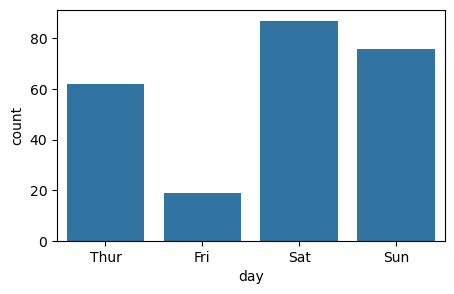

In [8]:
# frequency distribution table
sns.countplot(x='day', data=tips)
plt.show()

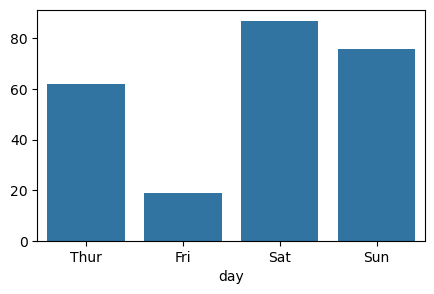

In [9]:
sns.barplot(x= day_tb.index, y=day_tb.values) 
plt.show()

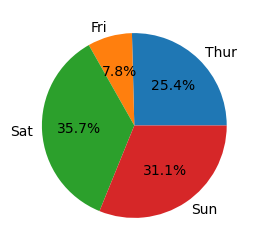

In [10]:
plt.pie(labels= day_tb.index, x=day_tb.values, autopct='%1.1f%%')
plt.show()

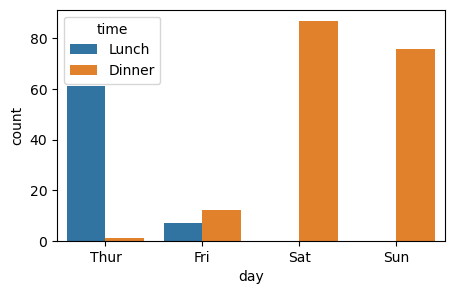

In [11]:
sns.countplot(x="day", hue="time", data=tips) # use hue (categorical values)
plt.show()

## hsb2 data

- Data of 200 high school students reserched by National Center of Education Statistics

- variable details
    - id	student ID
    - female	gender (0 : male, 1 : female)
    - race	race_type (1 : african american, 2: asian, 3: hispanic, 4: white)
    - ses	social economic status (1: low, 2: middle, 3: high)
    - schtyp	type of school (1: public, 2: private)
    - prog	type of school program (1: general, 2: academic, 3: vocational)
    * score
    - read	
    - write	
    - math	
    - science	
    - socst

In [22]:
hsb2 = pd.read_table('../data/hsb2.txt')

In [13]:
hsb2.head(n=3)

,id,female,race,ses,schtyp,prog,read,write,math,science,socst
0,70,0,4,1,1,1,57,52,41,47,57
1,121,1,4,2,1,3,68,59,53,63,61
2,86,0,4,3,1,1,44,33,54,58,31


In [14]:
# map function in pandas
gender_dic = {1 : 'Female', 0 : 'Male'}
race_dic = {1: 'African American', 2: 'Asian', 3: 'Hispanic', 4: 'White'}
ses_dic = {1 : 'Low', 2 : 'Middle', 3: 'High'}
schtyp_dic = {1: 'Public', 2: 'Private'}
prog_dic = {1 : 'General', 2 : 'Academic', 3: 'Vocational'}

hsb2['gender'] = hsb2.female.map(gender_dic)
hsb2['race_f'] = hsb2.race.map(race_dic)
hsb2['ses_f'] = hsb2.ses.map(ses_dic)
hsb2['schtyp_f'] = hsb2.schtyp.map(schtyp_dic)
hsb2['prog_f'] = hsb2.prog.map(prog_dic)

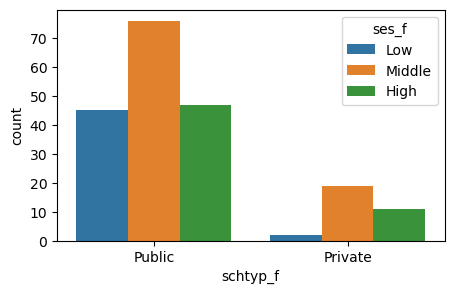

In [15]:
sns.countplot(x="schtyp_f", hue="ses_f", data=hsb2)
plt.show()

In [18]:
hsb2.schtyp_f.value_counts()

schtyp_f
Public     168
Private     32
Name: count, dtype: int64

# Apartment transaction data

In [23]:
apt = pd.read_excel('../data/아파트_실거래가_서울.xlsx')

In [24]:
apt.head(n=3)

,시군구,번지,본번,부번,단지명,전용면적(㎡),계약년월,계약일,거래금액(만원),층,건축년도,도로명,시,구,동
0,서울특별시 강남구 개포동,652,652,0,개포우성3차,104.43,202102,9,145000,6,1984,개포로 307,서울특별시,강남구,개포동
1,서울특별시 강남구 개포동,185,185,0,개포주공 6단지,53.06,202102,1,200000,12,1983,개포로 516,서울특별시,강남구,개포동
2,서울특별시 강남구 개포동,185,185,0,개포주공 6단지,73.02,202102,28,243000,7,1983,개포로 516,서울특별시,강남구,개포동


In [25]:
apt.columns

Index(['시군구', '번지', '본번', '부번', '단지명', '전용면적(㎡)', '계약년월', '계약일', '거래금액(만원)',
       '층', '건축년도', '도로명', '시', '구', '동'],
      dtype='object')

In [27]:
apt.rename(columns = {'전용면적(㎡)' : '면적', '거래금액(만원)' : '금액'})

,시군구,번지,본번,부번,단지명,면적,계약년월,계약일,금액,층,건축년도,도로명,시,구,동
0,서울특별시 강남구 개포동,652,652,0,개포우성3차,104.43,202102,9,145000,6,1984,개포로 307,서울특별시,강남구,개포동
1,서울특별시 강남구 개포동,185,185,0,개포주공 6단지,53.06,202102,1,200000,12,1983,개포로 516,서울특별시,강남구,개포동
2,서울특별시 강남구 개포동,185,185,0,개포주공 6단지,73.02,202102,28,243000,7,1983,개포로 516,서울특별시,강남구,개포동
3,서울특별시 강남구 개포동,649,649,0,경남2차,182.20,202102,5,327000,11,1984,언주로 110,서울특별시,강남구,개포동
4,서울특별시 강남구 개포동,649,649,0,경남2차,186.16,202102,6,332000,14,1984,언주로 110,서울특별시,강남구,개포동
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3822,서울특별시 중랑구 중화동,450,450,0,한신1차,50.37,202102,9,62000,19,1997,동일로 752,서울특별시,중랑구,중화동
3823,서울특별시 중랑구 중화동,450,450,0,한신1차,59.76,202102,9,66000,22,1997,동일로 752,서울특별시,중랑구,중화동
3824,서울특별시 중랑구 중화동,450,450,0,한신2,59.76,202102,1,65000,8,1998,동일로 752,서울특별시,중랑구,중화동
3825,서울특별시 중랑구 중화동,450,450,0,한신2,84.03,202102,2,79800,6,1998,동일로 752,서울특별시,중랑구,중화동


In [28]:
# korean enviroment setting (in Window)
from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)

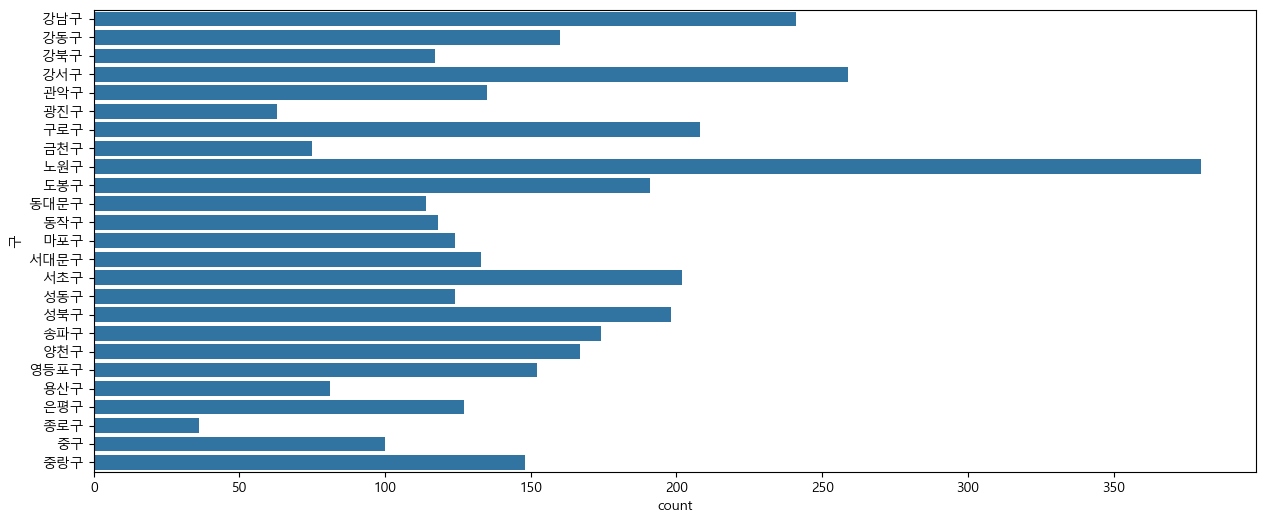

In [30]:
sns.countplot(y='구', data=apt)
plt.rcParams['figure.figsize'] = (13,6) # change size ..
plt.show()